<a href="https://colab.research.google.com/github/thanujTa/machine-learning-projects/blob/machine-learning/dogs%20and%20cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dogs and Cats Classifier

In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

## Getting Data from Freecodecamp

In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

## Data Preprocessing

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1/255.)
validation_image_generator = ImageDataGenerator(rescale=1/255.)
test_image_generator = ImageDataGenerator(rescale = 1/255.)

train_data_gen = train_image_generator.flow_from_directory(train_dir,
                                                           target_size = (150,150),
                                                           batch_size = batch_size,
                                                           class_mode = "binary")
val_data_gen =validation_image_generator.flow_from_directory(validation_dir,
                                                           target_size = (150,150),
                                                           batch_size = batch_size,
                                                           class_mode = "binary")
test_data_gen = test_image_generator.flow_from_directory("/content/cats_and_dogs/",
                                                         classes=["test"],
                                                         shuffle = False,
                                                         class_mode = "binary",
                                                         target_size = (150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


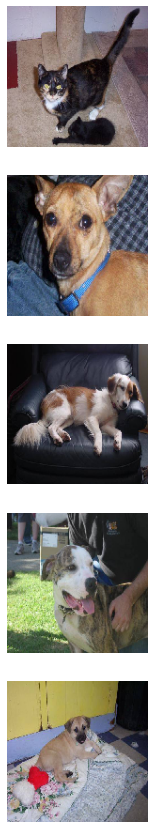

In [ ]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [ ]:
train_image_generator = ImageDataGenerator(rescale = 1/255.,
                                           rotation_range=20,
                                           width_shift_range=0.2, 
                                           height_shift_range=0.2,
                                           zoom_range=0.2,
                                           horizontal_flip =True)


Found 2000 images belonging to 2 classes.


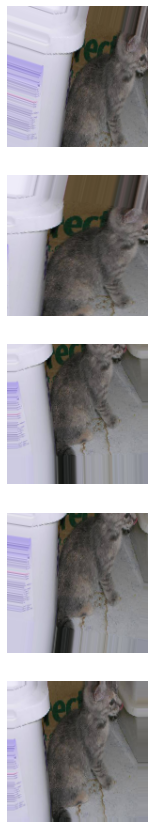

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

## Building a CNN

In [ ]:
model = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(150, 150, 3)),
  MaxPooling2D(pool_size=2),
  Conv2D(10, 3, activation='relu'),
  MaxPooling2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPooling2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

model.compile(loss= "binary_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 148, 148, 10)      280       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 74, 74, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 72, 72, 10)        910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 36, 36, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 34, 34, 10)        910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 17, 17, 10)      

In [ ]:
history = model.fit(train_data_gen,
                    epochs = epochs,
                    steps_per_epoch = len(train_data_gen),
                    validation_data = test_data_gen,
                    validation_steps = len(test_data_gen))

Epoch 1/15
16/16 [==============================] - 17s 1s/step - loss: 0.6910 - accuracy: 0.5160 - val_loss: 0.7329 - val_accuracy: 0.0400
Epoch 2/15
16/16 [==============================] - 16s 979ms/step - loss: 0.6814 - accuracy: 0.5540 - val_loss: 0.7552 - val_accuracy: 0.2600
Epoch 3/15
16/16 [==============================] - 16s 972ms/step - loss: 0.6631 - accuracy: 0.6070 - val_loss: 0.6898 - val_accuracy: 0.7000
Epoch 4/15
16/16 [==============================] - 16s 1s/step - loss: 0.6425 - accuracy: 0.6225 - val_loss: 0.9847 - val_accuracy: 0.2800
Epoch 5/15
16/16 [==============================] - 22s 1s/step - loss: 0.6314 - accuracy: 0.6330 - val_loss: 0.9441 - val_accuracy: 0.3800
Epoch 6/15
16/16 [==============================] - 16s 973ms/step - loss: 0.6279 - accuracy: 0.6330 - val_loss: 1.0399 - val_accuracy: 0.3400
Epoch 7/15
16/16 [==============================] - 16s 988ms/step - loss: 0.6161 - accuracy: 0.6620 - val_loss: 0.8344 - val_accuracy: 0.5800
Epoch 8/

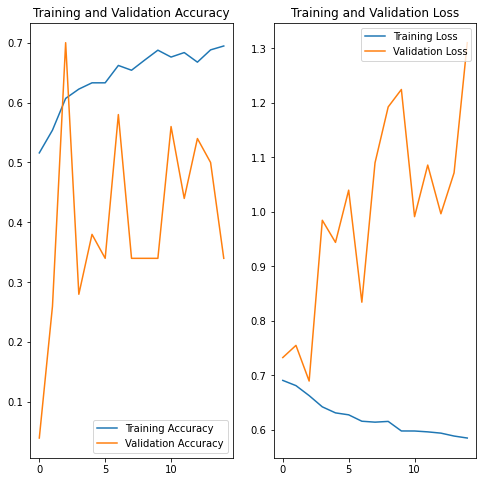

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
probabilities = model.predict(test_data_gen)
probabilities

array([[0.50323987],
       [0.39118066],
       [0.33052486],
       [0.89218795],
       [0.5824474 ],
       [0.63170266],
       [0.7782983 ],
       [0.25329205],
       [0.57248354],
       [0.97360015],
       [0.4976656 ],
       [0.7737408 ],
       [0.48404106],
       [0.31643596],
       [0.6944888 ],
       [0.76862526],
       [0.71050423],
       [0.91420996],
       [0.75933653],
       [0.62617886],
       [0.2605967 ],
       [0.75777954],
       [0.3404058 ],
       [0.7977294 ],
       [0.5857484 ],
       [0.35796618],
       [0.9620847 ],
       [0.38859567],
       [0.46879655],
       [0.5618751 ],
       [0.4099294 ],
       [0.30335513],
       [0.8216093 ],
       [0.9999124 ],
       [0.6208368 ],
       [0.71806616],
       [0.99696594],
       [0.72501963],
       [0.7074365 ],
       [0.47760406],
       [0.5236414 ],
       [0.546572  ],
       [0.8375503 ],
       [0.5645469 ],
       [0.56251514],
       [0.42363182],
       [0.6580128 ],
       [0.547

In [ ]:
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if np.round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers))

passed_challenge = percentage_identified > 0.63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 0.7% of the images of cats and dogs.
You passed the challenge!
